In [12]:
from bs4 import BeautifulSoup
from urllib.request import Request
from urllib.parse import quote
from urllib.request import urlopen
from konlpy.tag import Okt
from collections import Counter
from wordcloud import WordCloud
import koreanize_matplotlib
import matplotlib.pyplot as plt
import platform
import numpy as np
from PIL import Image
import collections
import pandas as pd

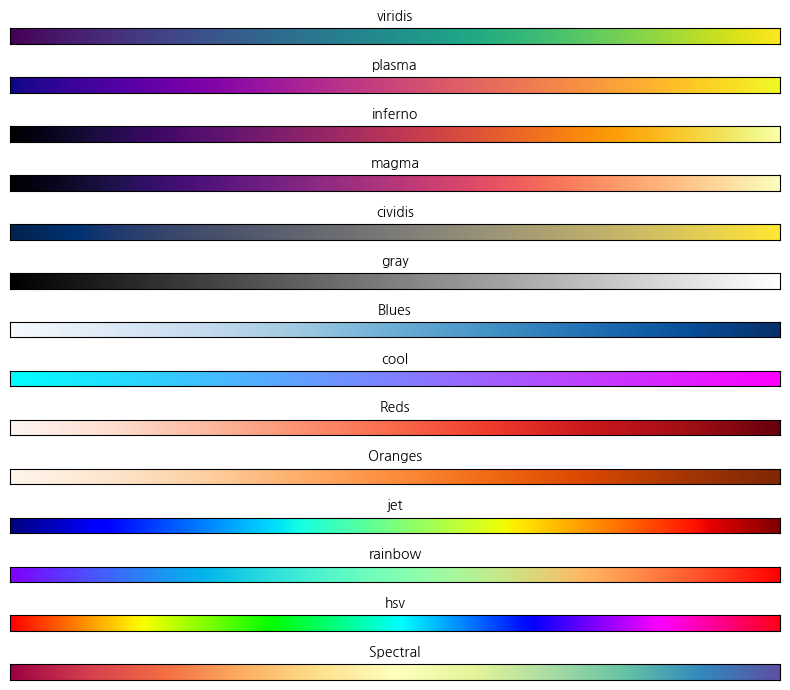

In [13]:
import matplotlib.pyplot as plt
import numpy as np

colormaps = ['viridis', 'plasma', 'inferno', 'magma', 'cividis',
             'gray', 'Blues', 'cool', 'Reds', 'Oranges',
             'jet', 'rainbow', 'hsv', 'Spectral']

fig, axes = plt.subplots(len(colormaps), 1, figsize=(8, len(colormaps) * 0.5))

gradient = np.linspace(0, 1, 256).reshape(1, -1)

for ax, cmap in zip(axes, colormaps):
    ax.imshow(gradient, aspect='auto', cmap=cmap)
    ax.set_title(cmap, fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()

In [14]:
def make_wordcloud(word_list, stopwords, word_count,image1='cloud.png' ,colormap1 ='plasma' ):
    okt = Okt()
    nouns_list = list()
    for i in range(len(word_list)):
        nouns_list.extend(okt.nouns(word_list[i]))
    
    counts = Counter(nouns_list)
    tags = counts.most_common(word_count)
    tag_dict = dict(tags)
    # 검색어 제외 방법 : dict에서 해당 검색어 제거
    for stopword in stopwords:
        if stopword in tag_dict:
            tag_dict.pop(stopword)
            
    print('-' * 80)
    print('tag_dict:', tag_dict)
    if platform.system() == 'Windows':
        path = r'c:\Windows\Fonts\malgun.ttf'
    elif platform.system() == 'Darwin': # Mac OS
        path = r'/System/Library/Fonts/AppleGothic'
    else:
        path = r'/usr/share/fonts/truetype/name/NanumMyeongjo.ttf'
        
    img_mask = np.array(Image.open(image1))
    wordcloud = WordCloud(font_path=path, width=800,
                        height=600,
                        background_color="white",
                        max_font_size=200,
                        repeat=True,
                        colormap= colormap1,
                        mask=img_mask)
    
    cloud = wordcloud.generate_from_frequencies(tag_dict)
    
    plt.figure(figsize=(10, 8))
    plt.axis('off')
    plt.imshow(cloud)
    plt.show()

In [15]:
def make_wordcloud_ph(word_list, stopwords, word_count,image1='cloud.png' ,colormap1 ='plasma' ):
    okt = Okt()
    phrases_list = list()
    for i in range(len(word_list)):
        phrases_list.extend(okt.phrases(word_list[i]))
    
    counts = Counter(phrases_list)
    tags = counts.most_common(word_count)
    tag_dict = dict(tags)
    # 검색어 제외 방법 : dict에서 해당 검색어 제거
    for stopword in stopwords:
        if stopword in tag_dict:
            tag_dict.pop(stopword)
            
    print('-' * 80)
    print('tag_dict:', tag_dict)
    if platform.system() == 'Windows':
        path = r'c:\Windows\Fonts\malgun.ttf'
    elif platform.system() == 'Darwin': # Mac OS
        path = r'/System/Library/Fonts/AppleGothic'
    else:
        path = r'/usr/share/fonts/truetype/name/NanumMyeongjo.ttf'
        
    img_mask = np.array(Image.open(image1))
    wordcloud = WordCloud(font_path=path, width=800,
                        height=600,
                        background_color="white",
                        max_font_size=200,
                        repeat=True,
                        colormap= colormap1,
                        mask=img_mask)
    
    cloud = wordcloud.generate_from_frequencies(tag_dict)
    
    plt.figure(figsize=(10, 8))
    plt.axis('off')
    plt.imshow(cloud)
    plt.show()

In [16]:
def make_list(filepath, listname):
    with open(filepath, 'r') as file:
        for i in file:
            filter_list = i.replace('•',' ').replace('-',' ').replace('#',' ').replace('*',' ').replace('\n',' ').replace('·',' ').replace('[',' ').replace(']',' ').split()
            listname.extend(filter_list)
    print(filepath)
    # print(listname)
    return listname

In [17]:
main_task = list()
make_list('main_task.txt', main_task)


main_task.txt


['주요업무',
 'Docker',
 '기반',
 '오피스',
 '솔루션',
 '구축',
 '및',
 '유지보수',
 '기업',
 '요청사항에',
 '따른',
 '솔루션',
 '기능개발',
 '사용하는',
 '기술',
 '및',
 '환경',
 'Docker,',
 'Spring',
 'Java,',
 'JPA,',
 'JavaScript,',
 'JSP,',
 'jQuery,',
 'Ajax,',
 'HTML5,',
 'CSS',
 '주요업무',
 '번역의',
 '의뢰부터',
 '진행/검수/납품/결제까지의',
 '전',
 '단계를',
 '커버하는',
 '번역',
 '서비스',
 '플랫폼을',
 '만듭니다.',
 '주요업무',
 'Unity',
 '3D',
 '개발',
 '디지털',
 '트윈',
 '플랫폼',
 '개발',
 'Unity',
 '엔진을',
 '이용한',
 '그래픽',
 '시뮬레이션',
 '프로그램',
 '개발',
 '주요업무',
 '담당',
 '업무',
 'DataSpace',
 '플랫폼',
 '설계',
 '및',
 '아키텍쳐',
 '정의',
 'DataSpace',
 '플랫폼',
 '상세',
 '서비스',
 '설계',
 'B2B',
 '마켓플레이스',
 '플랫폼',
 '설계',
 '검색(SEO),',
 '추천',
 '시스템,',
 '트랜잭션',
 '설계',
 '등',
 '플랫폼',
 '핵심',
 '기능',
 '설계',
 '데이터',
 '거래',
 '중심의',
 '비즈니스',
 '프로세스',
 '최적화서비스',
 '아키텍처',
 '설계',
 '결제',
 '및',
 '트랜잭션',
 '관리',
 '시스템',
 '설계',
 '및',
 '운영',
 '데이터',
 '기반',
 '고객',
 '맞춤형',
 '솔루션',
 '설계',
 '디지털',
 '자산',
 '거래',
 '솔루션',
 '설계',
 '및',
 '운영Data',
 'Space',
 'R&D',
 '팀',
 '리더십',
 '팀',
 '빌딩',
 '및',
 '조직화',
 '효율적인',
 '개발',
 

In [18]:
print(main_task)


['주요업무', 'Docker', '기반', '오피스', '솔루션', '구축', '및', '유지보수', '기업', '요청사항에', '따른', '솔루션', '기능개발', '사용하는', '기술', '및', '환경', 'Docker,', 'Spring', 'Java,', 'JPA,', 'JavaScript,', 'JSP,', 'jQuery,', 'Ajax,', 'HTML5,', 'CSS', '주요업무', '번역의', '의뢰부터', '진행/검수/납품/결제까지의', '전', '단계를', '커버하는', '번역', '서비스', '플랫폼을', '만듭니다.', '주요업무', 'Unity', '3D', '개발', '디지털', '트윈', '플랫폼', '개발', 'Unity', '엔진을', '이용한', '그래픽', '시뮬레이션', '프로그램', '개발', '주요업무', '담당', '업무', 'DataSpace', '플랫폼', '설계', '및', '아키텍쳐', '정의', 'DataSpace', '플랫폼', '상세', '서비스', '설계', 'B2B', '마켓플레이스', '플랫폼', '설계', '검색(SEO),', '추천', '시스템,', '트랜잭션', '설계', '등', '플랫폼', '핵심', '기능', '설계', '데이터', '거래', '중심의', '비즈니스', '프로세스', '최적화서비스', '아키텍처', '설계', '결제', '및', '트랜잭션', '관리', '시스템', '설계', '및', '운영', '데이터', '기반', '고객', '맞춤형', '솔루션', '설계', '디지털', '자산', '거래', '솔루션', '설계', '및', '운영Data', 'Space', 'R&D', '팀', '리더십', '팀', '빌딩', '및', '조직화', '효율적인', '개발', '환경', '및', '인프라', '구축', '주요업무AI', 'Model', 'Optimization', '모델', '압축(양자화,', '프루닝', '등),', '연산자', '퓨전,', '메모리', '최적화', '기

In [19]:
prefered = list()
make_list('prefered.txt', prefered)

prefered.txt


['우대사항',
 'Linux',
 '서버',
 '운영',
 '경험자',
 'Docker',
 '환경에서',
 '서비스',
 '유경험자',
 '서버',
 '이중화',
 '유경험자',
 '서버',
 '기반의',
 '제품',
 '서비스',
 '유경험자',
 '고객',
 '요구사항',
 '관련',
 '미팅',
 '및',
 '유지보수/구축업무를',
 '위한',
 '외근',
 '및',
 '출장',
 '가능한',
 '분',
 '제출자료',
 '이력서(자기소개서와',
 '기본',
 '인적사항',
 '기재해주세요.)',
 '경력기술서',
 '포트폴리오',
 '(선택사항)',
 '우대사항',
 'Microservice',
 'Architecture에',
 '익숙하신',
 '분',
 'Domain',
 'driven',
 'Development에',
 '관심이',
 '있거나',
 '조예가',
 '깊으신',
 '분',
 '대용량',
 'Transaction',
 '처리',
 '경험이',
 '있으신',
 '분',
 'Concurrent',
 'Programming에',
 '경험이',
 '있으신',
 '분',
 'Socket',
 'programming',
 '경험이',
 '있으신',
 '분',
 'DevOps',
 '경험이',
 '있으신',
 '분',
 '우대사항컴퓨터공학,',
 '기계공학',
 '전공하신',
 '분',
 '컴퓨터',
 '그래픽스에',
 '대한',
 '이해도를',
 '보유하신',
 '분',
 '디지털',
 '트윈',
 '개념과',
 '응용',
 '사례',
 '경험이',
 '있으신',
 '분',
 '클라이언트',
 '서버',
 '구조의',
 '네트워크',
 '(TCP,UDP)',
 '연동',
 '경험이',
 '있으신',
 '분',
 '개발',
 '설계',
 '문서',
 '작성이',
 '가능하신',
 '분',
 '작업',
 '내용',
 '및',
 '가이드',
 '문서화',
 '할',
 '수',
 '있는',
 '능력을',
 '보유하신',
 '분',
 '자발적이고',
 '

In [20]:
required = list()
make_list('required.txt', required)


required.txt


['자격요건',
 '자격요건',
 '신입',
 '~',
 '경력',
 '6년',
 '이하',
 'Spring',
 '기반',
 'Java',
 'API',
 '구현',
 '및',
 '내부',
 '서비스',
 '구현',
 'HTML5,',
 'CSS3',
 '웹',
 '표준에',
 '대한',
 '이해',
 'JS(ES6)/HTML/CSS를',
 '이용해',
 '웹',
 '페이지',
 '개발',
 '가능하신',
 '분',
 'RDBMS(MariaDB)',
 '사용',
 '경험이',
 '있으신',
 '분',
 '고객사와',
 '원활하게',
 '소통이',
 '가능하며',
 '외근',
 '및',
 '출장',
 '업무에',
 '거부감이',
 '없으신',
 '분',
 '필요지식',
 '및',
 '기술',
 'Spring',
 '기반',
 'Java',
 'API',
 '구현',
 '및',
 '내부',
 '서비스',
 '구현',
 'HTML5,',
 'CSS3',
 '웹',
 '표준에',
 '대한',
 '이해',
 'JavaScript에',
 '대한',
 '이해',
 '및',
 '활용',
 'shell',
 'script에',
 '대한',
 '이해',
 '이런',
 '분을',
 '선호해요!',
 '새로운',
 'AI',
 '기술과',
 '트렌드에',
 '대한',
 '열린',
 '자세로',
 '끊임없이',
 '학습',
 '적용하며,',
 '변화에',
 '유연하게',
 '대응하는',
 '태도가',
 '좋은',
 '분',
 '협업',
 '동료와의',
 '원활한',
 '커뮤니케이션을',
 '바탕으로',
 '협업을',
 '이끌어내고,',
 '요구사항을',
 '정확히',
 '파악하여',
 '반영하는',
 '태도가',
 '좋은',
 '분',
 '사용자',
 '중심의',
 '관점과',
 '논리적',
 '사고를',
 '통해',
 '문제를',
 '파악하고',
 '해결책을',
 '제시할',
 '수',
 '있는',
 '태도가',
 '좋은',
 '분',
 '자격요건',
 '매너있지만',
 '확실하

In [21]:
benefit = list()
make_list('benefit.txt', benefit)

benefit.txt


['혜택',
 '및',
 '복지',
 'Polaris',
 'Office',
 'Culture',
 '■',
 '성장의',
 '에너지를',
 '경험해요!',
 '폴라리스오피스는',
 '가파르게',
 '성장하며',
 '지금은',
 '5개',
 '상장사로',
 '구성된',
 '폴라리스오피스그룹의',
 '모회사가',
 '되었어요.',
 '구성원으로',
 '합류한다면',
 '성장의',
 '에너지와',
 '문화를',
 '경험할',
 '수',
 '있어요!',
 '국내',
 '최초',
 '온디바이스',
 'AI',
 '오피스',
 '솔루션으로',
 '글로벌',
 '1억',
 '3천만명',
 '이상의',
 '가입자를',
 '보유하고',
 '있어요!',
 '높은',
 '트래픽을',
 '지닌',
 '서비스를',
 '경험하며',
 '성장하고',
 '커리어도',
 'Level',
 'Up!',
 '할',
 '수',
 '있어요.',
 '개발자가',
 '성장할',
 '수',
 '있는',
 '문화를',
 '지향해요.',
 'Devday,',
 '개인',
 '연구시간',
 '부여,',
 '직무',
 '관련',
 '도서/교육비를',
 '폭넓게',
 '지원하며',
 '새로운',
 '기술을',
 '경험하고',
 '성장할',
 '수',
 '있는',
 '환경을',
 '만들어가고',
 '있어요.',
 '■',
 '커뮤니케이션은',
 '수평적으로,',
 '업무는',
 '체계적으로',
 '해요!',
 '영어',
 '호칭을',
 '사용한',
 '지',
 '무려',
 '10년차!',
 '유연한',
 '커뮤니케이션을',
 '위해',
 '직급을',
 '사용하지',
 '않고',
 '누구나',
 '적극적으로',
 '의견을',
 '낼',
 '수',
 '있는',
 '환경을',
 '만들었어요.',
 '“Meet',
 'up',
 'with',
 'Project”',
 '행사를',
 '통해',
 '프로젝트별',
 '목표와',
 '성과를',
 '전사에',
 '공유하고',
 '회고하는',
 '시간을',
 '가져요.',
 '

In [22]:
text = """나랏말이 중국과 달라 한자와 서로 통하지 아니하므로,
우매한 백성들이 말하고 싶은 것이 있어도 마침내 제 뜻을 잘 표현하지 못하는 사람이 많다.
내 이를 딱하게 여기어 새로 스물여덟 자를 만들었으니,
사람들로 하여금 쉬 익히어 날마다 쓰는 데 편하게 할 뿐이다."""
okt = Okt()
# morphs(text): 텍스트를 형태소 단위로 나눔
okt_morphs = okt.morphs(text)
print('morphs():\n', okt_morphs)
# 명사만 추출
okt_nouns = okt.nouns(text)
print('nouns():\n', okt_nouns)
# phrases(text): 어절 추출
okt_phrases = okt.phrases(text)
print('phrases():\n', okt_phrases)
# pos(text): 품사를 태깅
okt_pos = okt.pos(text)
print('pos():\n', okt_pos)

morphs():
 ['나랏말', '이', '중국', '과', '달라', '한자', '와', '서로', '통', '하지', '아니하므로', ',', '\n', '우매', '한', '백성', '들', '이', '말', '하고', '싶은', '것', '이', '있어도', '마침내', '제', '뜻', '을', '잘', '표현', '하지', '못', '하는', '사람', '이', '많다', '.', '\n', '내', '이를', '딱하게', '여기어', '새로', '스물', '여덟', '자를', '만들었으니', ',', '\n', '사람', '들', '로', '하여금', '쉬', '익히어', '날', '마다', '쓰는', '데', '편하게', '할', '뿐', '이다', '.']
nouns():
 ['나랏말', '중국', '달라', '한자', '서로', '통', '우매', '백성', '말', '것', '마침내', '제', '뜻', '표현', '사람', '내', '스물', '여덟', '사람', '쉬', '날', '데', '뿐']
phrases():
 ['나랏말', '중국', '중국과 달라', '중국과 달라 한자', '중국과 달라 한자와 서로', '중국과 달라 한자와 서로 통', '우매', '백성들', '마침내', '마침내 제', '마침내 제 뜻', '표현', '못하는 사람', '스물여덟', '사람들', '달라', '한자', '서로', '사람', '스물', '여덟']
pos():
 [('나랏말', 'Noun'), ('이', 'Josa'), ('중국', 'Noun'), ('과', 'Josa'), ('달라', 'Noun'), ('한자', 'Noun'), ('와', 'Josa'), ('서로', 'Noun'), ('통', 'Noun'), ('하지', 'Verb'), ('아니하므로', 'Adjective'), (',', 'Punctuation'), ('\n', 'Foreign'), ('우매', 'Noun'), ('한', 'Josa'), ('백성', 'Noun'), ('들', '

sector_list len: 55360
--------------------------------------------------------------------------------
tag_dict: {'개발': 2037, '서비스': 914, '데이터': 751, '관리': 627, '운영': 606, '기술': 604, '설계': 600, '시스템': 556, '등': 464, '기반': 455, '개선': 434, '팀': 415, '위': 406, '수': 404, '구축': 361, '분석': 329, '테스트': 322, '유지': 318, '환경': 315, '최적화': 315, '를': 294, '활용': 264, '모델': 263, '진행': 260, '기능': 259, '고객': 258, '보수': 255, '플랫폼': 248, '성능': 248, '백엔드': 244, '구현': 239, '제품': 238, '지원': 233, '인프라': 222, '솔루션': 212, '웹': 206, '통해': 196, '수행': 196, '사용자': 191, '앱': 186, '코드': 178, '처리': 173, '자동화': 173, '보안': 171, '경험': 169, '효율': 166, '해결': 166, '대한': 165}


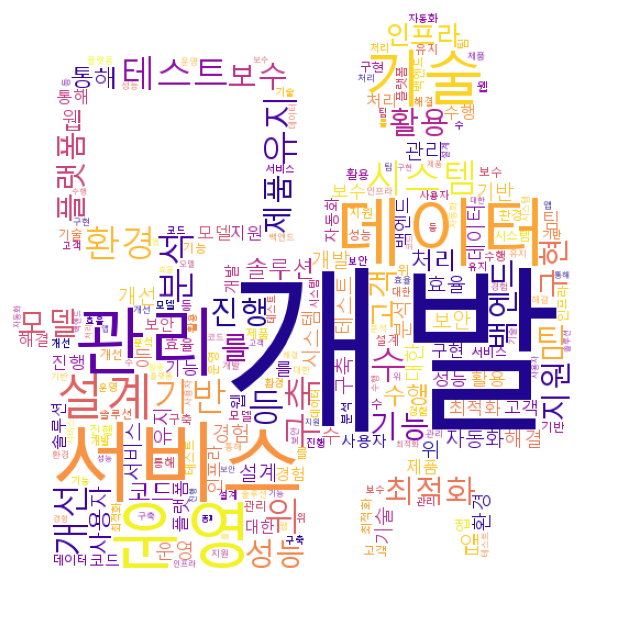

In [23]:
stopwords = ['및', '주요업무', '업무'] # wordcloud에서 제외할 단어

print(f'sector_list len: {len(main_task)}')
make_wordcloud(main_task, stopwords, 50,image1='working.png')

--------------------------------------------------------------------------------
tag_dict: {'경험': 3042, '분': 2642, '우대': 1121, '개발': 1082, '사항': 1036, '등': 735, '대한': 583, '서비스': 552, '관련': 429, '운영': 410, '이해': 347, '기술': 342, '데이터': 316, '보유': 308, '수': 304, '사용': 293, '활용': 290, '환경': 284, '시스템': 258, '기반': 255, '설계': 243, '구축': 238, '프로젝트': 201, '능력': 196, '처리': 186, '관심': 183, '테스트': 168, '를': 168, '클라우드': 163, '협업': 158, '해결': 156, '분석': 152, '관리': 146, '코드': 145, '커뮤니케이션': 143, '자동화': 143, '문제': 141, '위': 140, '최적화': 139, '팀': 137, '경력': 136, '개선': 133, '지원': 132, '더': 116, '배포': 116, '지식': 115, '이상': 112, '웹': 108}


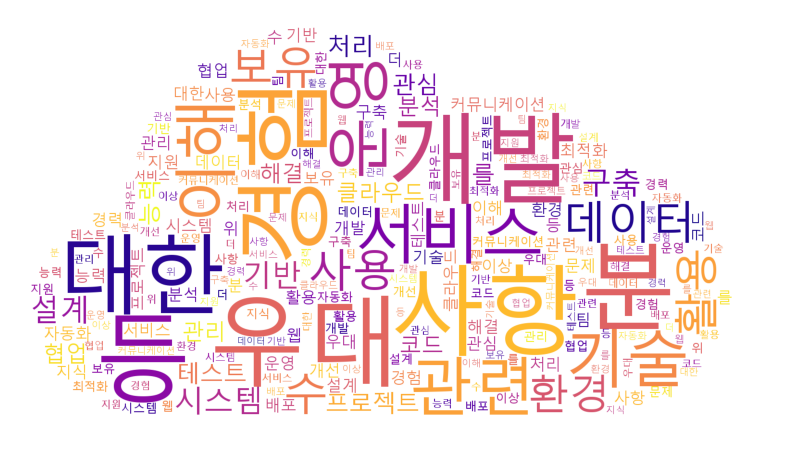

In [24]:
make_wordcloud(prefered, stopwords, 50)

--------------------------------------------------------------------------------
tag_dict: {'데이터': 264, '3년': 254, 'React': 237, 'Python': 210, '커뮤니케이션': 203, 'API': 199, '시스템': 196, 'js': 196, '5년': 189, '백엔드': 187, 'AWS': 186, '언어': 178, 'Java': 175, '분석': 158, '프로젝트': 156, 'Spring': 148, '프레임워크': 147, '구축': 139, '프로그래밍': 136, '코드': 133, '테스트': 131, 'Git': 129, 'AI': 116, '클라우드': 114, '도구': 111, '실무': 110, '2년': 110, '이용': 109, '이해도': 109, '경험자': 108, '분야': 103, '데이터베이스': 103, '프론트엔드': 102, '작성': 101, '구현': 96, '전공': 92, '공학': 91, '배포': 91, '컴퓨터': 87, '최적화': 87, 'MySQL': 87, 'CSS': 86, 'Kotlin': 84, '필수': 82, 'JavaScript': 79, 'TypeScript': 79, '보안': 77, 'HTML': 76, '네트워크': 76, '학력': 76, '개선': 76, '학사': 75, '모델': 74, 'SQL': 74, 'Typescript': 74, '통한': 74, '처리': 73, 'Node': 72, '스택': 71, '관심': 71, '서버': 70, '러닝': 70, '인프라': 69, 'RDBMS': 68, 'CD': 68, '학습': 66, 'RESTful': 66, 'Vue': 66, 'CI': 63, '제품': 63, '자동화': 62, '소프트웨어': 62, '대해': 61}


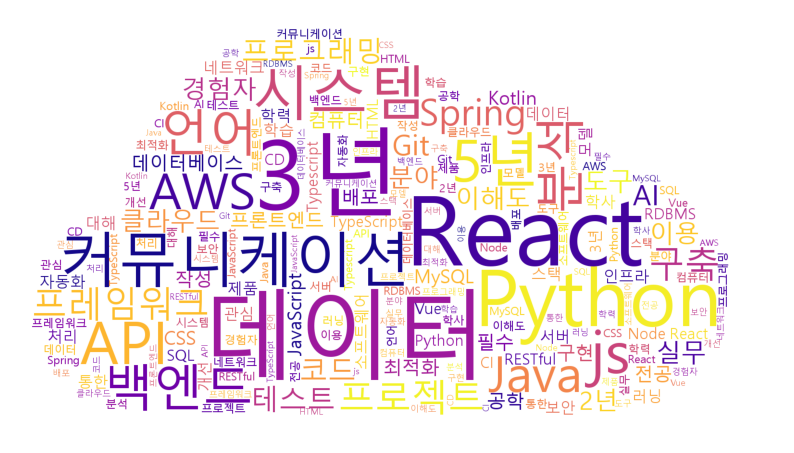

In [25]:
stopwords=['분','요건','자격','이상','경험','개발','자격요건','대한','경력','이해',
           '보유','능력','사용','서비스','운영','활용','설계','관련','기반','기술','관리',
           '문제','환경','해결','협업','역량','지식','업무']
make_wordcloud_ph(required, stopwords, 100)

--------------------------------------------------------------------------------
tag_dict: {'휴가': 1281, '연차': 615, '선물': 557, '도서': 543, '생일': 532, '건강검진': 487, '문화': 480, '교육': 471, '간식': 458, '명절': 443, '식대': 437, '환경': 434, '회사': 426, '개인': 404, '위해': 389, '자율': 386, '장비': 380, '서류': 378, '관련': 373, '야근': 367, '점심': 365, '시간': 351, '무제한': 346, '비용': 336, '직원': 327, '경조사': 314, '직무': 310, '진행': 308, '경우': 307, '출근': 305, '보험': 303, '출퇴근': 283, '반차': 279, '커피': 278, '건강': 276, '축하': 264, '장기': 257}


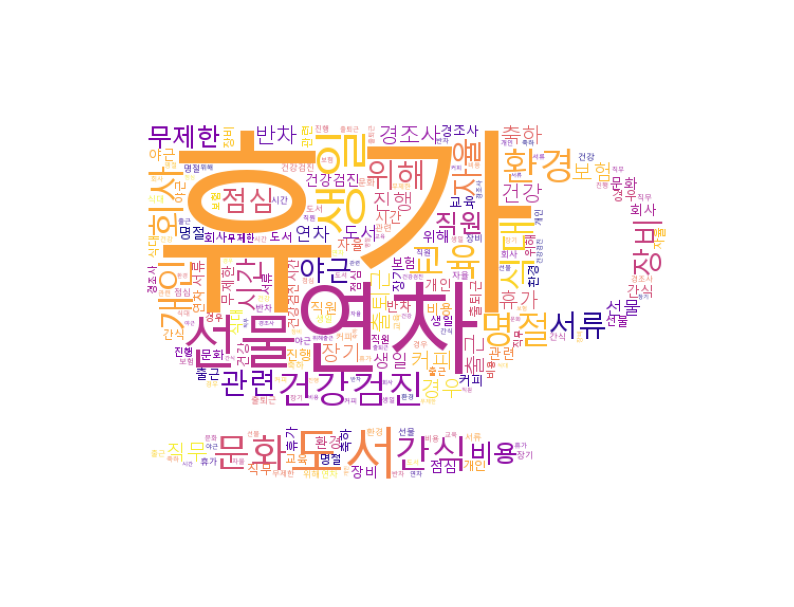

In [26]:
stopwords = ['사내','성장','사용','운영','제도','및', '지원', '제공', '복지', '수', '비','등','시','채용','위','팀','혜택','지급','업무','근무']
# stopwords = []
make_wordcloud_ph(benefit,stopwords, 50, image1='cup.png')

--------------------------------------------------------------------------------
tag_dict: {'휴가': 1281, '연차': 615, '선물': 557, '도서': 543, '생일': 532, '건강검진': 487, '문화': 480, '교육': 471, '간식': 458, '명절': 443, '식대': 437, '환경': 434, '회사': 426, '개인': 404, '위해': 389, '자율': 386, '장비': 380, '서류': 378, '관련': 373, '야근': 367, '점심': 365, '시간': 351, '무제한': 346, '비용': 336, '직원': 327, '경조사': 314, '직무': 310, '진행': 308, '경우': 307, '출근': 305, '보험': 303, '출퇴근': 283, '반차': 279, '커피': 278, '건강': 276, '축하': 264, '장기': 257}


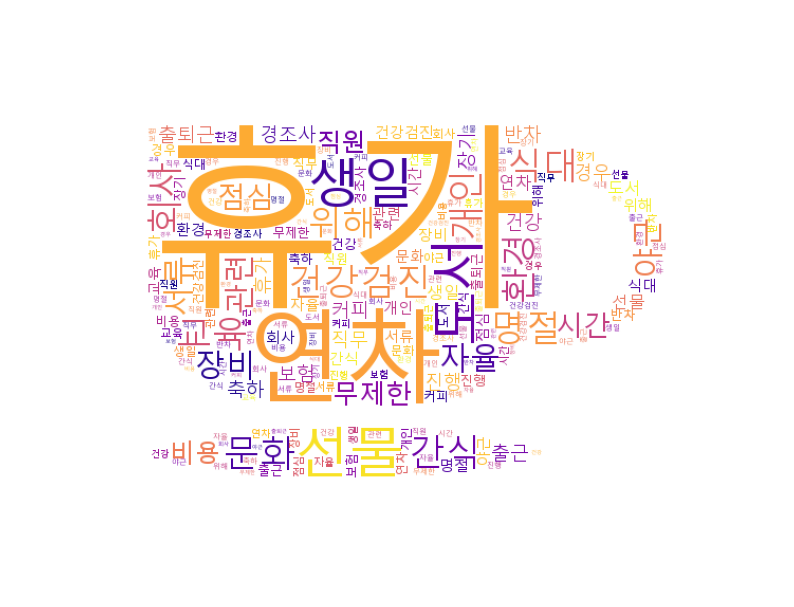

In [27]:
stopwords = ['사내','성장','사용','운영','제도','및', '지원', '제공', '복지', '수', '비','등','시','채용','위','팀','혜택','지급','업무','근무']
# stopwords = []
make_wordcloud_ph(benefit,stopwords, 50, image1='cup.png')

In [28]:
fitSR = pd.Series({'휴가': 1281, '연차': 615, '선물': 557, '도서': 543, '생일': 532, '건강검진': 487, '문화': 480, '교육': 471, '간식': 458, '명절': 443, '식대': 437, '환경': 434, '회사': 426, '개인': 404, '위해': 389, '자율': 386, '장비': 380, '서류': 378, '관련': 373, '야근': 367, '점심': 365, '시간': 351, '무제한': 346, '비용': 336, '직원': 327, '경조사': 314, '직무': 310, '진행': 308, '경우': 307, '출근': 305, '보험': 303, '출퇴근': 283, '반차': 279, '커피': 278, '건강': 276, '축하': 264, '장기': 257})
fitSR


휴가      1281
연차       615
선물       557
도서       543
생일       532
건강검진     487
문화       480
교육       471
간식       458
명절       443
식대       437
환경       434
회사       426
개인       404
위해       389
자율       386
장비       380
서류       378
관련       373
야근       367
점심       365
시간       351
무제한      346
비용       336
직원       327
경조사      314
직무       310
진행       308
경우       307
출근       305
보험       303
출퇴근      283
반차       279
커피       278
건강       276
축하       264
장기       257
dtype: int64

In [29]:
fitSR_sorted = fitSR.sort_values()

In [30]:
fitSR_sorted.shape

(37,)

In [31]:
# %pip install squarify
import squarify  # 트리맵 라이브러리

# 데이터 생성
# 트리맵 그리기
plt.figure(figsize=(4, 4))
squarify.plot(fitSR_sorted[17:], 
              label=fitSR_sorted.index[17:], alpha=0.7, 
              color=plt.cm.Spectral(np.linspace(0, 1, len(fitSR_sorted)))[::-1]
              )

# 그래프 설정
plt.axis('off')  # 축 제거

plt.show()

ModuleNotFoundError: No module named 'squarify'

In [ ]:
sceDF = pd.DataFrame(pd.read_csv('source.csv', index_col=0))

In [ ]:
sce_list = sceDF['포지션'].tolist()

--------------------------------------------------------------------------------
tag_dict: {'개발자': 1091, '엔지니어': 473, '백엔드': 393, '프론트엔드': 251, '플랫폼': 112, '서비스': 104, '웹': 102, '데이터': 100, '솔루션': 80, '시스템': 79, '시니어': 75, '서버': 75, '운영': 72, '담당자': 72, '소프트웨어': 69, '보안': 67, '풀': 64, '스택': 64, '앱': 62, '기술': 56, '분석': 53, '신입': 53, '병역': 47, '특례': 47, '리드': 39, '사업': 39, '지원': 38, '주니어': 37, '본부': 37, '블록': 36, '체인': 36, '클라우드': 35, '연구원': 34, '인프라': 33, '러닝': 30, '근무': 30, '모바일': 29, '연구': 29, '펌웨어': 28, '일본': 28, '보충역': 27, '하드웨어': 26, '머신': 25, '쿠팡': 25}


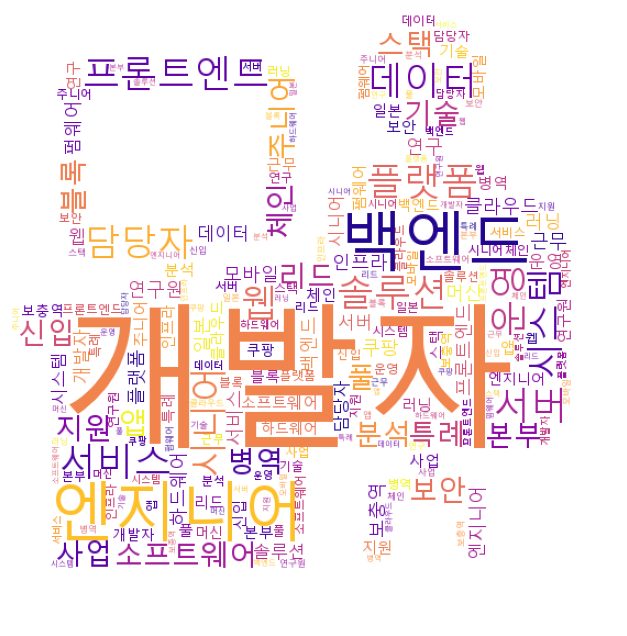

In [ ]:
stopwords = [ '개발', '이상','팀','요원','가능','및','기능','리더','트','부']
make_wordcloud(sce_list,stopwords,50,image1='working.png')

In [ ]:
sceDF['지역명'].unique()

array(['서울 구로구 ', '서울 마포구 ', '서울 금천구 ', '울산 중구 ', '서울 강남구 ', '서울 서초구 ',
       '서울 중구 ', '경기 성남시 ', '경기 화성시 ', '서울 영등포구 ', '서울 성동구 ', '대전 유성구 ',
       '서울 송파구 ', '서울 종로구 ', '서울 관악구 ', '경기 의왕시 ', '경기 안양시 ', '인천 서구 ',
       '경기 용인시 ', '서울 ', '경기 고양시 ', '서울 강서구 ', '충북 청주시 ', '서울 용산구 ',
       '경기 ', '경기 과천시 ', '부산 부산진구 ', '제주 제주시 ', '서울 도봉구 ', '서울 광진구 ',
       '광주 북구 ', '서울 동작구 ', '서울 서대문구 ', '인천 연수구 ', '충남 천안시 ', '대구 북구 ',
       '부산 해운대구 ', '경기 군포시 ', '대구 남구 ', '경기 포천시 ', '대전 서구 ', '경기 광명시 ',
       '서울 강동구 ', '경기 하남시 ', '부산 ', '서울 동대문구 ', '경북 포항시 ', '인천 부평구 ',
       '경기 파주시 ', '부산 북구 ', '대구 수성구 ', '경기 수원시 ', '경기 남양주시 ', '경기 안산시 ',
       '서울 노원구 ', '충남 아산시 ', '경기 김포시 ', '대구 동구 ', '충남 공주시 ', '세종 ',
       '경기 광주시 ', '경북 안동시 ', '경남 창원시 ', '전북 군산시 ', '부산 영도구 ', '인천 계양구 ',
       '경기 부천시 ', '경기 평택시 ', '대구 서구 ', '경기 시흥시 '], dtype=object)

--------------------------------------------------------------------------------
tag_dict: {'서울': 2611, '강남구': 1155, '경기': 496, '서초구': 327, '성남시': 318, '마포구': 167, '성동구': 156, '영등포구': 130, '중구': 117, '송파구': 114, '금천구': 81, '구로구': 79, '용산구': 63, '종로구': 52, '관악구': 51, '강서구': 42, '안양시': 37, '대전': 33, '유성구': 31, '인천': 29, '용인시': 28, '연수구': 25, '수원시': 20, '과천시': 18, '부산': 14, '광진구': 13, '화성시': 12, '충남': 11, '해운대구': 8, '동대문구': 8, '경북': 8, '고양시': 7, '천안시': 7, '군포시': 7, '대구': 6, '강동구': 6, '포항시': 6, '부천시': 6, '서구': 4, '서대문구': 4, '광명시': 4, '남양주시': 4, '울산': 3, '부산진구': 3, '북구': 3, '동작구': 3, '파주시': 3, '안산시': 3, '아산시': 3, '도봉구': 2}


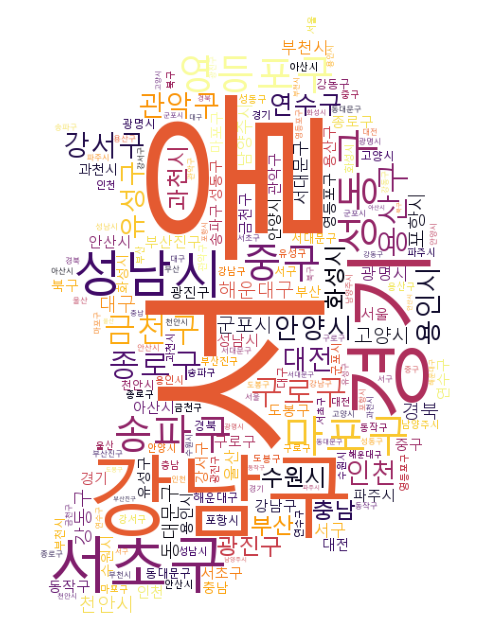

In [ ]:
region_list = sceDF['지역명'].tolist()
stopwords = []
make_wordcloud(region_list,stopwords,50, image1='southkorea.png' ,colormap1='inferno')

In [ ]:
for i in range(len(region_list)):
    region_list[i] = region_list[i][:2]
sidoSR = pd.Series(region_list)
sidoSR.value_counts()
    

서울    2611
경기     496
대전      33
인천      29
부산      14
충남      11
경북       8
대구       6
울산       3
충북       1
제주       1
광주       1
세종       1
경남       1
전북       1
Name: count, dtype: int64

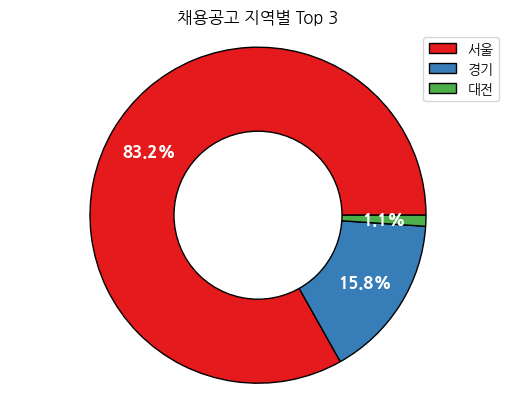

In [ ]:
top3_values = sidoSR.value_counts()[:3]
top3_labels = top3_values.index

cmap = plt.cm.Set1

plt.pie(top3_values, 
        labels=top3_labels,  
        autopct='%1.1f%%', 
        startangle=0, 
        colors=cmap(range(len(top3_values))),  
        textprops={'color': 'white', 'fontsize': 12, 'fontweight': 'bold'},
        wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'linestyle': 'solid', 'antialiased': True},
        pctdistance=0.75) 

centre_circle = plt.Circle((0, 0), 0.50, fc='white', edgecolor="black")  
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.legend(top3_labels, loc="best") 

plt.axis('equal')  

plt.title("채용공고 지역별 Top 3")
plt.show()

In [ ]:
sceDF['경력'].unique()

array([' 신입-경력 6년', ' 경력 5-10년', ' 경력 10년 이상', ' 경력 3-15년', ' 신입',
       ' 경력 3년 이상', ' 경력 3-10년', ' 경력 3-6년', ' 경력 3-16년', ' 경력 4-10년',
       ' 경력 5-15년', ' 경력 4-8년', ' 경력 5년 이상', ' 경력 2-7년', ' 신입-경력 5년',
       ' 경력 2-5년', ' 경력 6-20년', ' 신입-경력 8년', ' 경력 3-5년', ' 신입-경력 20년',
       ' 경력 3-25년', ' 경력 6-10년', ' 경력 2-6년', ' 경력 1-6년', ' 경력 2년 이상',
       ' 경력 7-15년', ' 경력 3-8년', ' 경력 7년 이상', ' 경력 4-20년', ' 경력 3-7년',
       ' 경력 7-10년', ' 경력 1-3년', ' 경력 1-10년', ' 경력 3년', ' 경력 3-12년',
       ' 경력 1년 이상', ' 경력 5-12년', ' 신입-경력 10년', ' 경력 8-12년', ' 경력 10-20년',
       ' 경력 5-13년', ' 경력 4-11년', ' 경력 8-20년', ' 경력 7-17년', ' 경력 7-20년',
       ' 경력 10-15년', ' 경력 8년', ' 경력 10년', ' 경력 10-30년', ' 경력 2-15년',
       ' 경력 4-7년', ' 경력 1-5년', ' 경력 2-8년', ' 경력 8년 이상', ' 경력 1-7년',
       ' 경력 4년 이상', ' 경력 7-12년', ' 경력 4-12년', ' 경력 10-13년', ' 경력 1-4년',
       ' 경력 5-20년', ' 경력 1-15년', ' 경력 9년 이상', ' 경력 5-8년', ' 경력 2-10년',
       ' 경력 3-20년', ' 신입-경력 3년', ' 경력 3-11년', ' 신입-경력 2년', ' 경력 6-12년',
       ' 신입 이상'

--------------------------------------------------------------------------------
tag_dict: {'경력': 3045, '이상': 888, '신입': 371}


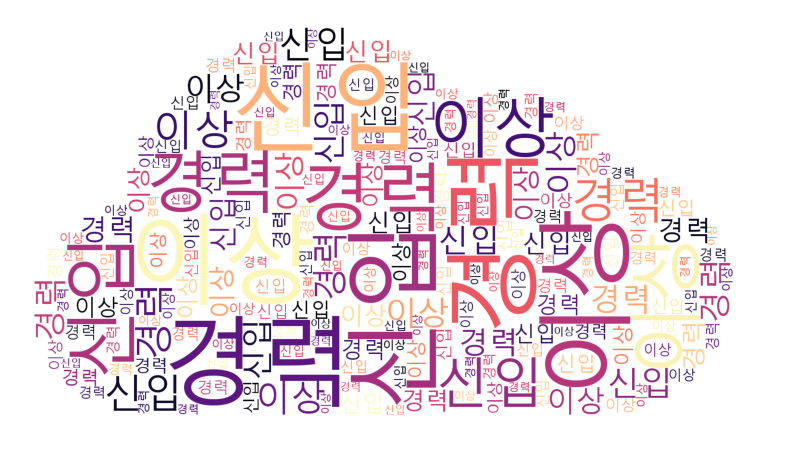

In [ ]:
years_list = sceDF['경력'].tolist()
stopwords = []
make_wordcloud(years_list,stopwords,50, 'magma')

In [36]:
fsourceDF = pd.DataFrame(pd.read_csv('source.csv', encoding='utf-8',index_col=0))

In [39]:
fsourceDF['경력'].str.contains('신입').sum()

371

In [41]:
fsourceDF['경력'].str.contains('경력').sum()

3045

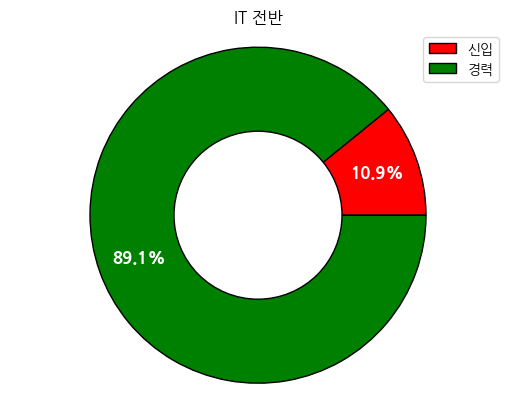

In [51]:
years2 = pd.Series({'신입':371,'경력':3045})

top3_labels = years2.index

cmap = plt.cm.Set1

plt.pie(years2, 
        labels=top3_labels,  
        autopct='%1.1f%%', 
        startangle=0,
        colors=('red','green'),
        textprops={'color': 'white', 'fontsize': 12, 'fontweight': 'bold'},
        wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'linestyle': 'solid', 'antialiased': True},
        pctdistance=0.75) 

centre_circle = plt.Circle((0, 0), 0.50, fc='white', edgecolor="black")  
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.legend(top3_labels, loc="best") 

plt.axis('equal')  

plt.title("IT 전반")
plt.show()